# ES Module 4

Welcome back! As a reminder, last week, we went over creating and filtering tables. If you don't feel comfortable with tables yet, please go back and review them, as we'll continue to use them for this module.

This week, we'll be reviewing filtering and going over data visualizations. 

For this module, please continue to work in pairs.

Before starting, run the cell below to load the data science libraries.

In [24]:
from datascience import *
import numpy as np
# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Filtering

As a reminder, here is the general form for filtering: 

`some_table.where('column_name', predicate(arg))`

* `some_table` refers to the name of your table.
* `column_name` is the column you're referring to
* `predicate` is the predicate you're using (you can find the list of predicates by running the cell below). 
* `arg` is the argument your predicate takes. More details about this too when you run the below cell.

In [25]:
functions = make_array('are.equal_to(Z)', 'are.above(x)', 'are.above_or_equal_to(x)', 'are.below(x)', 
                       'are.below_or_equal_to(x)', 'are.between(x, y)', 'are.strictly_between(x, y)',
                      'are.between_or_equal_to(x, y)', 'are.containing(S)')
descriptions = make_array('Equal to Z', 'Greater than x', 'Greater than or equal to x', 'Below x', 
                         'Less than or equal to x', 'Greater than or equal to x, and less than y',
                         'Greater than x and less than y', 'Greater than or equal to x, and less than or equal to y',
                         'Contains the string S')
predicates = Table().with_columns('Predicate', functions,
                                 'Description', descriptions)
predicates

Predicate,Description
are.equal_to(Z),Equal to Z
are.above(x),Greater than x
are.above_or_equal_to(x),Greater than or equal to x
are.below(x),Below x
are.below_or_equal_to(x),Less than or equal to x
"are.between(x, y)","Greater than or equal to x, and less than y"
"are.strictly_between(x, y)",Greater than x and less than y
"are.between_or_equal_to(x, y)","Greater than or equal to x, and less than or equal to y"
are.containing(S),Contains the string S


Below, load the data table `state_incarceration.csv`. We'll primarily be working with this data set. 

In [26]:
# clean me
state_incarceration = Table.read_table('state_incarceration.csv')
state_incarceration

State,Population,Total Incarcerated,Incarcerated Males,Incarcerated Females
Alabama/f,4858979,"44,400","39,900","4,400"
Alaska,738432,"5,300","4,600",700
Arizona,6828065,"54,800","49,000","5,800"
Arkansas,2978204,"23,400","21,000","2,400"
California/f,39144818,"210,000","194,000","15,900"
Colorado,5456574,"31,500","27,900","3,600"
Connecticut,3590886,"16,600","15,500","1,100"
Delaware,945934,"7,000","6,400",600
District of Columbia,672228,"1,600","1,500",100
Florida,20271272,"153,800","138,800","15,000"


Now, run the following cell to clean the data.

In [27]:
# filtering
def string_to_int(val):
    return int(val.replace(',', ''))

state_incarceration = state_incarceration.with_columns('State', state_incarceration.column('State'),
                                                       'Population', state_incarceration.column('Population'),
                                                       'Total Incarcerated', state_incarceration.apply(string_to_int, 'Total Incarcerated'),
                                                       'Incarcerated Males', state_incarceration.apply(string_to_int, 'Incarcerated Males'),
                                                       'Incarcerated Females', state_incarceration.apply(string_to_int, 'Incarcerated Females'))
state_incarceration

State,Population,Total Incarcerated,Incarcerated Males,Incarcerated Females
Alabama/f,4858979,44400,39900,4400
Alaska,738432,5300,4600,700
Arizona,6828065,54800,49000,5800
Arkansas,2978204,23400,21000,2400
California/f,39144818,210000,194000,15900
Colorado,5456574,31500,27900,3600
Connecticut,3590886,16600,15500,1100
Delaware,945934,7000,6400,600
District of Columbia,672228,1600,1500,100
Florida,20271272,153800,138800,15000


Now, in the following cell, filter `state_incarceration` so it only has states for which the total incarcerated population exceeds 50,000 and save it to `incarcerated_above_50000`.

In [39]:
#clean
incarcerated_above_50000 = state_incarceration.where('Total Incarcerated', are.above(50000))
incarcerated_above_50000

State,Population,Total Incarcerated,Incarcerated Males,Incarcerated Females
Arizona,6828065,54800,49000,5800
California/f,39144818,210000,194000,15900
Florida,20271272,153800,138800,15000
Georgia/g,10214860,89500,80700,8800
Illinois,12859995,67200,62400,4800
Michigan/f,9922576,59400,54900,4500
New York,19795791,77500,72700,4700
North Carolina,10042802,54000,49200,4800
Ohio,11613423,69100,61800,7300
Pennsylvania/f,12802503,85200,77700,7500


What proportion (percentage) of states have a total incarcerated population of above 50000? Write your answer in the following cell. 

In [29]:
proportion = 

SyntaxError: invalid syntax (<ipython-input-29-dd616e97b412>, line 1)

Now, filter the data so it only has states where the population is below 5,000,000. 

In [30]:
#clean
low_population = state_incarceration.where('Population', are.below(5000000))
low_population

State,Population,Total Incarcerated,Incarcerated Males,Incarcerated Females
Alabama/f,4858979,44400,39900,4400
Alaska,738432,5300,4600,700
Arkansas,2978204,23400,21000,2400
Connecticut,3590886,16600,15500,1100
Delaware,945934,7000,6400,600
District of Columbia,672228,1600,1500,100
Hawaii,1431603,5900,5200,700
Idaho,1654930,11000,9400,1600
Iowa,3123899,12700,11400,1300
Kansas,2911641,16800,15000,1800


Lastly, filter the data so it only contains states where the proportion of the incarcerated population over the population is more than 0.006. 

(Hint: You may need to add another column to your table. To add another column to your table, use the following command:

`some_table.with_column('Column Name', corresponding_array)`

where `some_table` is a table that already exists). 

In [31]:
# clean me
new_table = state_incarceration.with_column('proportion', state_incarceration.column('Total Incarcerated') / state_incarceration.column('Population'))
new_table.where('proportion', are.above(0.006))

State,Population,Total Incarcerated,Incarcerated Males,Incarcerated Females,proportion
Alabama/f,4858979,44400,39900,4400,0.00913772
Alaska,738432,5300,4600,700,0.00717737
Arizona,6828065,54800,49000,5800,0.0080257
Arkansas,2978204,23400,21000,2400,0.00785708
Delaware,945934,7000,6400,600,0.00740009
Florida,20271272,153800,138800,15000,0.00758709
Georgia/g,10214860,89500,80700,8800,0.00876175
Idaho,1654930,11000,9400,1600,0.00664681
Indiana,6619680,44500,39300,5200,0.00672238
Kentucky,4425092,33500,28600,4900,0.00757046


Now, find the states in which the proportion of incarcerated females to incarcerated males is between 0.1 and 0.12, inclusive. 

In [32]:
#clean me
f_to_m = state_incarceration.with_column('proportion', state_incarceration.column('Incarcerated Females') / state_incarceration.column('Incarcerated Males'))
f_to_m.where('proportion', are.between_or_equal_to(0.1, 0.12))

State,Population,Total Incarcerated,Incarcerated Males,Incarcerated Females,proportion
Alabama/f,4858979,44400,39900,4400,0.110276
Arizona,6828065,54800,49000,5800,0.118367
Arkansas,2978204,23400,21000,2400,0.114286
Florida,20271272,153800,138800,15000,0.108069
Georgia/g,10214860,89500,80700,8800,0.109046
Iowa,3123899,12700,11400,1300,0.114035
Kansas,2911641,16800,15000,1800,0.12
Minnesota,5489594,16200,14700,1500,0.102041
Nebraska,1896190,8500,7600,900,0.118421
Ohio,11613423,69100,61800,7300,0.118123


Good job! We have learned how to filter our data. Filtering is quite important since without it we wouldn't be able to work on our data. The datascience library gives you a tool to efficiently clean and convert your data, don't take it for granted (it's really a pain without it).

## Visualizations

Hurray for Visualizations! Now we'll be working on the showy part of data sciece.

Visualisation is a cruicial component of data science for great many reasons, but probably the most important reason is - It is the easiest way for humans to detect patterns and trends. We will start off with basic graphs such as bar charts and scatter plots, and advance to more complex graphs in the following modules so hang tight.

### Bar Charts

Bar charts are useful tools for visualizing categorical data. For example, the following bar chart shows information about the incarcerated population per state. 

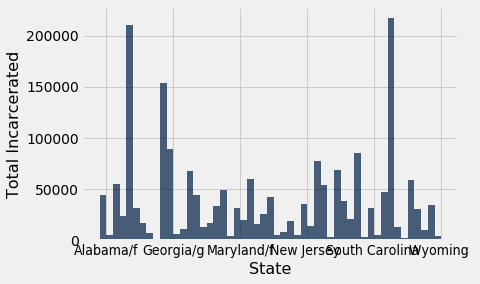

In [36]:
state_incarceration.bar('State', 'Total Incarcerated')

This visualization give us a lot of informations, for example we can instantly see here that there are 3 states with over 100000 incarcerated people, and all three of them rise above the 150000 lines too, which could indicate a much stricter policy than all other states. 

Lets try to make this bar chart slightly more informative by focusin on specific states. Please plot a bar chart using the variable you created earlier `incarcerated_above_50000` so we can see some more trends.

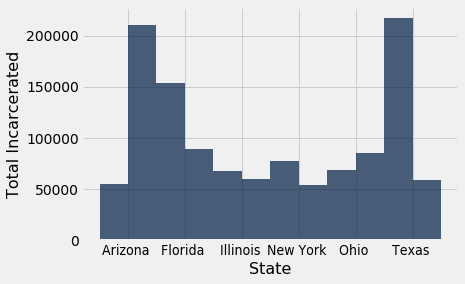

In [37]:
incarcerated_above_50000.bar('State', 'Total Incarcerated')

This is slightly more convenient to the eye, but we are still overpopulating the graph. Lets try again, please make a new variable 'incarcerated_above_100000' which will hold all the states with more than 100,000 people.

In [43]:
incarcerated_above_100000 = state_incarceration.where('Total Incarcerated', are.above(100000))

Now lets plot and see. Plot a bar chart with the above variable in the next cell.

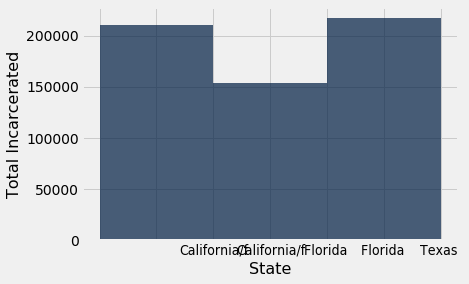

In [41]:
incarcerated_above_100000.bar('State', 'Total Incarcerated')

Now we can see all the states of interest. Were you suprised to see California as the second highest (by 3%) incarcerated state? So were we. Lets investigate!

### Scatter Plots

Scatter plots are useful in order to see the distribution of the data (If you don't know what that means exactly, don't worry you'll find out quite soon). Essentially, we wish to see how the data is `scattered`, thus we plot the every data point as a real point on a graph! Let's try:

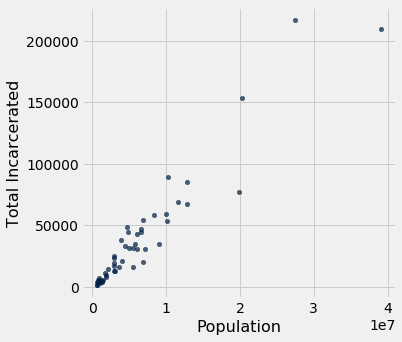

In [45]:
state_incarceration.scatter('Population', 'Total Incarcerated')

Ain't that a beaute? The data is distributed in such a way (line) that allows us to comfortably infer that the increase in size correlates with increase in increase of incarcerated. 

Let's try to get some more focused information. Please plot the scatter plot of `incarcerated_above_50000`.

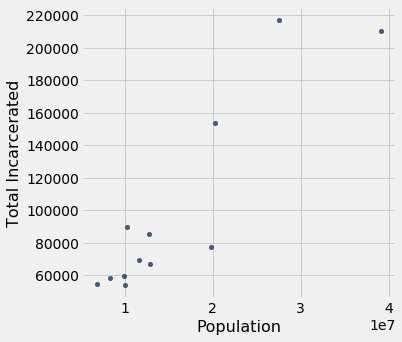

In [47]:
incarcerated_above_50000.scatter('Population', 'Total Incarcerated')

In this case, plotting a more focused view of the data doesn't give us much more information. It is important to notice that scatter plots are good for getting intuition about a larger quantities of data or the total distribution of some data set you work on. Thus, we need another type of graph so really understand what's going on!

### Line Graph 

Line graphs are great, they let you see exactly how the data points connect, implying how the information 'develops'. Here, as we already statee, there is a steady increase of inmates reltive to population size. Let's see how it develops more precisely:

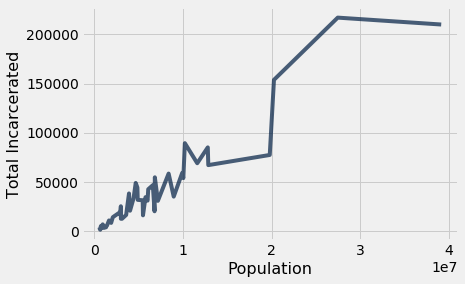

In [48]:
state_incarceration.plot('Population', 'Total Incarcerated')

This is slightly weird shape indeed, but it still moves in a clear trend which assures our assertions. Still, we haven't gotten to the bottom of our previously stated conundrum, why is California up there? Please line plot the variable  `incarcerated_above_50000` to get a more focused view once more.

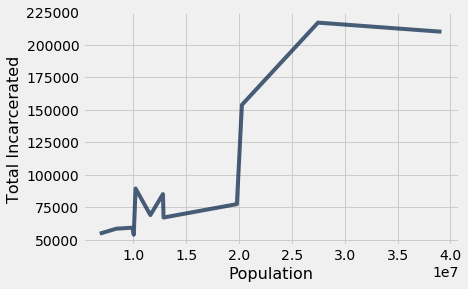

In [49]:
incarcerated_above_50000.plot('Population', 'Total Incarcerated')

Huh, an interesting shape! What do you think it implies? Maybe a different approach could help.
Let's make a new variable called `high_population` with states that contain above 15000000 people and line plot the population against the total incarcerated!

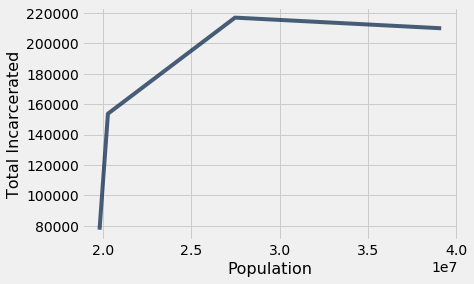

In [57]:
high_population = state_incarceration.where('Population', are.above(15000000))
high_population.plot('Population', 'Total Incarcerated')

Well, the plot hasn't really changed much. Sometimes this happens, we can't deduct too much information with the tools we currently have, that's why we must learn more advanced tools in the next modules!

Before we finish, it is important that you notice one thing, if you look at the last `subline`, the one that has a negative slope (decrease in total incarcerated population), you can see that compared to Florida and Texas, California is relatively shy on the numbers of incarcerated people. Keep in mind though that it is only compared to those two states. We will investigate more in the following modules, see you next time!